<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5>Support Vector Machines</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 07, 2024</font>

Import libraries and packages.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Logistic Regression VS SVM

Read in the data on customers.

In [64]:
customers_data = pd.read_csv('datasets/customers_data.csv')

In [65]:
customers_data.head()

,debt_to_income_ratio,credit_score,Defaulted
0,7.520215,14.611884,0
1,15.129782,4.930069,1
2,8.880535,14.964281,0
3,7.594710,13.827473,0
4,6.332894,14.837548,0


Create a scatter plot to visualize the data.

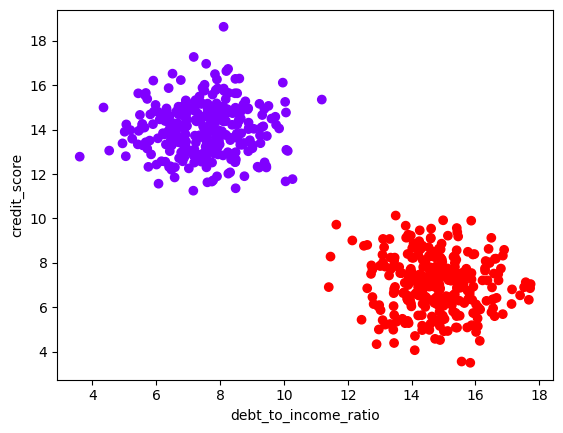

In [66]:
## Add your code here
y=customers_data['Defaulted']
plt.scatter(customers_data['debt_to_income_ratio'],customers_data['credit_score'],c=y,cmap="rainbow")
plt.xlabel("debt_to_income_ratio")
plt.ylabel("credit_score")
plt.show()






Divide the data into features and labels.

In [67]:
## Add your code here

X=customers_data.drop(['Defaulted'],axis=1)
y=customers_data['Defaulted']



Standardize data.

In [68]:
## Add your code here

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)





In [69]:
X_scaled_df

,debt_to_income_ratio,credit_score
0,-0.942445,1.113507
1,1.048920,-1.524572
2,-0.586460,1.209527
3,-0.922950,0.899772
4,-1.253158,1.174995
...,...,...
595,0.866506,-0.678940
596,-0.626377,1.255178
597,-1.599383,0.921535
598,-1.103266,0.809239


Create an instance of LogisticRegression object.

In [70]:
## Add your code here

model_linear=LogisticRegression(random_state=42)




Train a logistic regression model.

In [71]:
## Add your code here

model_linear.fit(X_scaled,y)



LogisticRegression(random_state=42)

Get the coefficients of the logistic regression model.

In [72]:
## Add your code here
w_0=model_linear.intercept_
w_1=model_linear.coef_[0][0]
w_2=model_linear.coef_[0][1]

Print the coefficients

In [73]:
## Add your code here

print(f"The intercept is {w_0[0]:.4f} \n w_1 is {w_1:.4f} \n w_2 is {w_2:.4f}")

The intercept is 0.0789 
 w_1 is 3.0928 
 w_2 is -2.9843


Construct the decision boundary for logistic regression.

In [74]:
## Get the minimum value of debt_to_income_ratio using X_scaled

dir_min=np.min(X_scaled_df['debt_to_income_ratio'])



In [75]:
## Get the maximum value of debt_to_income_ratio using X_scaled

dir_max=np.max(X_scaled_df['debt_to_income_ratio'])

In [76]:
## use np.linspace to create x_values for constructing the decision boundary

x_values=np.linspace(
    dir_min-1,
    dir_max+1,
    500
)




Create a variable called **decision_boundary_log** and use x_values to construct the decision boundary.

In [77]:
#w1x1+w2x2+w0=0 ; x2= -w1\w2*x_1 -w0\w2
decision_boundary=-(w_1/w_2*x_values + w_0/w_2)

Define an instance of SVM classifier. Setting C to be very large to enforce a hard margin classifier.

In [78]:
## Add your code here
model_svm=SVC(C=1e5,kernel='linear',random_state=42)




Train a linear SVM model.

In [79]:
## Add your code here

model_svm.fit(X_scaled,y)



SVC(C=100000.0, kernel='linear', random_state=42)

Get the coefficients of the SVM model.

In [80]:
## Add your code here

w_0_svm=model_svm.intercept_[0]
w_1_svm=model_svm.coef_[0][0]
w_2_svm=model_svm.coef_[0][1]

print(model_svm.coef_)



[[ 1.62727065 -2.53282293]]


In [81]:
## Add your code here
print(f"SVM : \n intercept:{w_0_svm} \n w_1: {w_1_svm} \n w_2: {w_2_svm}")




SVM : 
 intercept:0.224803469436637 
 w_1: 1.6272706456937203 
 w_2: -2.532822925318486


Construct the decision boundary for SVM. Use the same x_values from before.

In [82]:
## Add your code here

decision_boundary_svm=-1*(w_1_svm/w_2_svm*x_values+w_0_svm/w_2_svm)



Construct the margins.

In [83]:
## Add your code here

margin=1/np.sqrt(np.sum(model_svm.coef_[0]**2))
margin_up=decision_boundary_svm+margin
margin_down=decision_boundary_svm-margin



Get the support vectors. Refer to the scikit learn documentation.

In [84]:
## Add your code here

support_vectors=model_svm.support_vectors_




Plot everything on the same plot.

In [85]:
X_scaled_df.head()

,debt_to_income_ratio,credit_score
0,-0.942445,1.113507
1,1.048920,-1.524572
2,-0.586460,1.209527
3,-0.922950,0.899772
4,-1.253158,1.174995


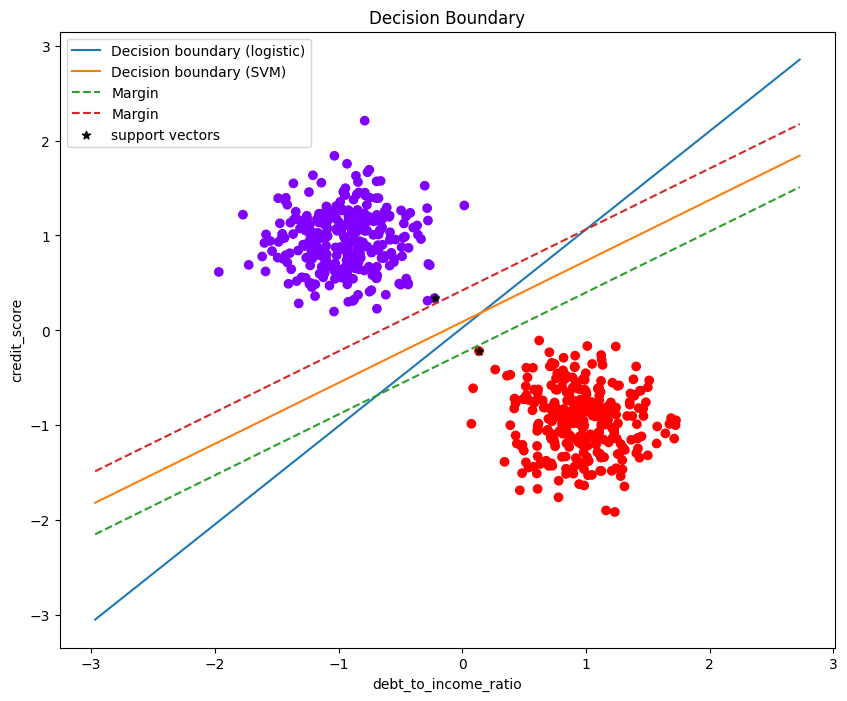

In [89]:
plt.figure(figsize=(10, 8))

## use plt.scatter to plot the datapoints
plt.scatter(X_scaled_df['debt_to_income_ratio'],X_scaled_df['credit_score'],c=y,cmap="rainbow")





## use plt.plot to plot the logistic regression decision boundary
plt.plot(x_values,decision_boundary,label="Decision boundary (logistic)")




## use plt.plot to plot the SVM decision boundary

plt.plot(x_values,decision_boundary_svm,label="Decision boundary (SVM)")


## Use plt.plot to plot the SVM margins
plt.plot(x_values,margin_down,"--",label="Margin")
plt.plot(x_values,margin_up,"--",label="Margin")






## Use plt.scatter to plot the support vectors

plt.scatter(support_vectors[:,0],support_vectors[:,1],color="k",marker='*',label="support vectors")






## Add xlabel, ylabel, title, and legend.

plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.title("Decision Boundary")
plt.legend()
plt.show()









## Soft Margin SVM

In [90]:
customers_data = pd.read_csv('datasets/customers_data_full.csv')

In [91]:
customers_data.head()

,debt_to_income_ratio,credit_score,Defaulted
0,8.660771,12.432697,0
1,16.988660,6.198146,1
2,13.105094,4.957098,1
3,15.371849,6.169990,1
4,14.387207,11.443520,1


#### Create a hard-maring classifier and create a plot to visualize the data points along with the resulting decision boundary, margins, and support vectors.

In [92]:
X=customers_data.drop(['Defaulted'],axis=1)
y=customers_data['Defaulted']

In [93]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [98]:
model_svm_hard=SVC(C=1e5, kernel="linear",random_state=42)
model_svm_hard.fit(X_scaled,y)

SVC(C=100000.0, kernel='linear', random_state=42)

In [95]:
dir_max=np.max(X_scaled[:,0])
dir_min=np.min(X_scaled[:,0])

In [96]:
x_values=np.linspace(
    dir_min-1,
    dir_max+1,
    500
)

In [99]:
w_0_hard=model_svm_hard.intercept_[0]
w_1_hard=model_svm_hard.coef_[0][0]
w_2_hard=model_svm_hard.coef_[0][1]


In [100]:
decision_boundary_svm_hard=-1*((w_1_hard/w_2_hard)*x_values+w_0_hard/w_2_hard)

In [101]:
margin_hard=1/np.sqrt(np.sum(model_svm_hard.coef_[0]**2))
margin_below=decision_boundary_svm_hard-margin_hard
margin_above=decision_boundary_svm_hard+margin_hard


In [102]:
support_vectors_hard=model_svm_hard.support_vectors_

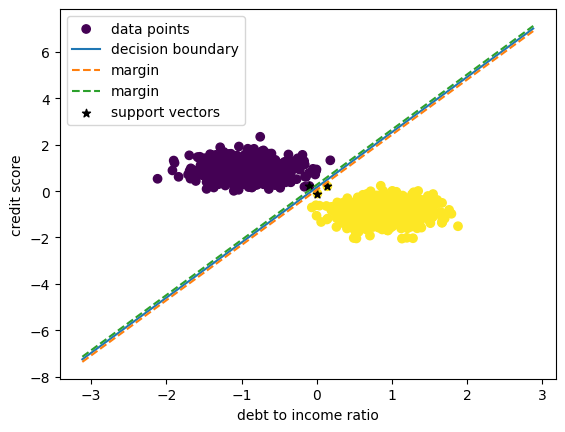

In [104]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,label="data points")
plt.plot(x_values,decision_boundary_svm_hard,label="decision boundary")
plt.plot(x_values,margin_below,"--",label="margin")
plt.plot(x_values,margin_above,"--",label="margin")
plt.scatter(support_vectors_hard[:,0],support_vectors_hard[:,1],marker='*',color="k",label="support vectors")
plt.xlabel('debt to income ratio')
plt.ylabel('credit score')
plt.legend()
plt.show()

#### Create a soft-maring classifier and create a plot to visualize the data points along with the resulting decision boundary, margins, and support vectors.

In [107]:
model_svm_soft=SVC(C=1, kernel="linear",random_state=42)
model_svm_soft.fit(X_scaled,y)

SVC(C=1, kernel='linear', random_state=42)

In [108]:
w_0_soft=model_svm_soft.intercept_[0]
w_1_soft=model_svm_soft.coef_[0][0]
w_2_soft=model_svm_soft.coef_[0][1]

In [109]:
decision_boundary_svm_soft=-1*((w_1_soft/w_2_soft)*x_values+w_0_soft/w_2_soft)


In [110]:
margin_soft=1/np.sqrt(np.sum(model_svm_soft.coef_[0]**2))
margin_below=decision_boundary_svm_soft-margin_soft
margin_above=decision_boundary_svm_soft+margin_soft


In [111]:
support_vectors_soft=model_svm_soft.support_vectors_

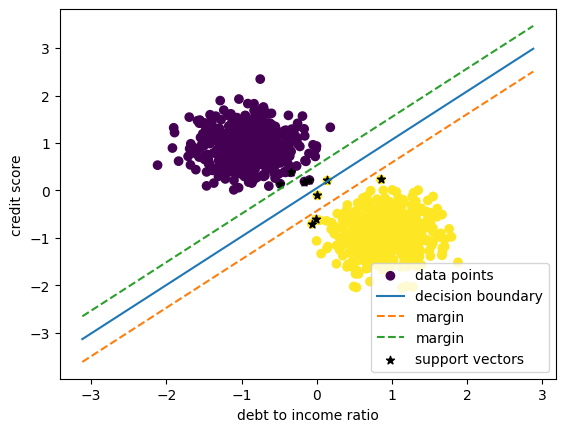

In [112]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,label="data points")
plt.plot(x_values,decision_boundary_svm_soft,label="decision boundary")
plt.plot(x_values,margin_below,"--",label="margin")
plt.plot(x_values,margin_above,"--",label="margin")
plt.scatter(support_vectors_soft[:,0],support_vectors_soft[:,1],marker='*',color="k",label="support vectors")
plt.xlabel('debt to income ratio')
plt.ylabel('credit score')
plt.legend()
plt.show()

In [113]:
model_svm_soft.n_support_

array([4, 5], dtype=int32)

## SVM with RBF Kernel

In [115]:
patients_data = pd.read_csv('datasets/patients_data.csv')

In [116]:
patients_data.head()

,blood_biomarker_level,heart_rate_variability,Risk
0,0.422494,0.206446,1
1,-0.382710,0.158482,1
2,-0.568391,0.306051,1
3,-0.389914,0.349151,1
4,0.454089,-0.890466,0


Create a scatter plot of the data.

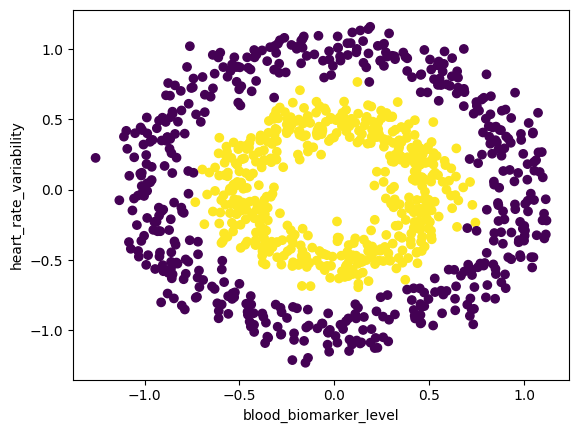

In [117]:
## Add your code here

plt.scatter(patients_data['blood_biomarker_level'],patients_data['heart_rate_variability'],c=patients_data['Risk'])
plt.xlabel("blood_biomarker_level")
plt.ylabel("heart_rate_variability")
plt.show()






Split the data into features and target variable.

In [119]:
## Add your code here
X=patients_data.drop(['Risk'],axis=1)
y=patients_data['Risk']




Convert features dataframe to Numpy array.

In [120]:
## Add your code here

X=np.array(X)




Define an instance called **svm_rbf** of SVC with a *Gaussian kernel*, *C* = 1, *sigma* = 0.5 

In [124]:
## Add your code here
sigma=0.5
gamma=1/(2*sigma**2)
svm_rbf=SVC(C=1,kernel='rbf',gamma=gamma,random_state=42)




Fit the SVM instance on the training data.

In [125]:
## Add your code here

svm_rbf.fit(X,y)





SVC(C=1, gamma=2.0, random_state=42)

Check out the support vectors.

In [126]:
## Add your code here

svm_rbf.support_vectors_




array([[-0.83131012,  0.22758476],
       [-0.21782155, -0.83346865],
       [ 0.49066493,  0.69144892],
       [ 0.55024845,  0.63169177],
       [ 0.75768869,  0.18827741],
       [-0.7683172 , -0.02869951],
       [-0.59280122, -0.56714014],
       [-0.84409794, -0.09149334],
       [ 0.28018046, -0.74922748],
       [ 0.86219961, -0.09440031],
       [-0.71802436, -0.45926148],
       [-0.7617249 , -0.35941416],
       [ 0.84243686,  0.03555092],
       [-0.13956286, -0.85227678],
       [ 0.52934326, -0.63103225],
       [ 0.8408609 ,  0.0574976 ],
       [ 0.7496173 , -0.29256999],
       [ 0.60278008, -0.56824643],
       [-0.7034738 ,  0.48180813],
       [ 0.83167442,  0.25566831],
       [-0.74216398,  0.12021156],
       [ 0.41807725, -0.70090828],
       [-0.19667276, -0.84291893],
       [-0.79317199, -0.16471577],
       [-0.76964318,  0.1326734 ],
       [-0.00719537,  0.87983061],
       [ 0.24449066, -0.76438639],
       [ 0.71310514,  0.21788395],
       [-0.85361704,

Create a grid to construct decision boundary.

In [127]:
x_min, x_max = X_scaled[:, 0].min() - 0.25, X_scaled[:, 0].max() + 0.25
y_min, y_max = X_scaled[:, 1].min() - 0.25, X_scaled[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Construct SVM decision boundary.

In [128]:
grid = np.c_[xx.ravel(), yy.ravel()]

In [129]:
decision_boundary = svm_rbf.decision_function(grid).reshape(xx.shape)

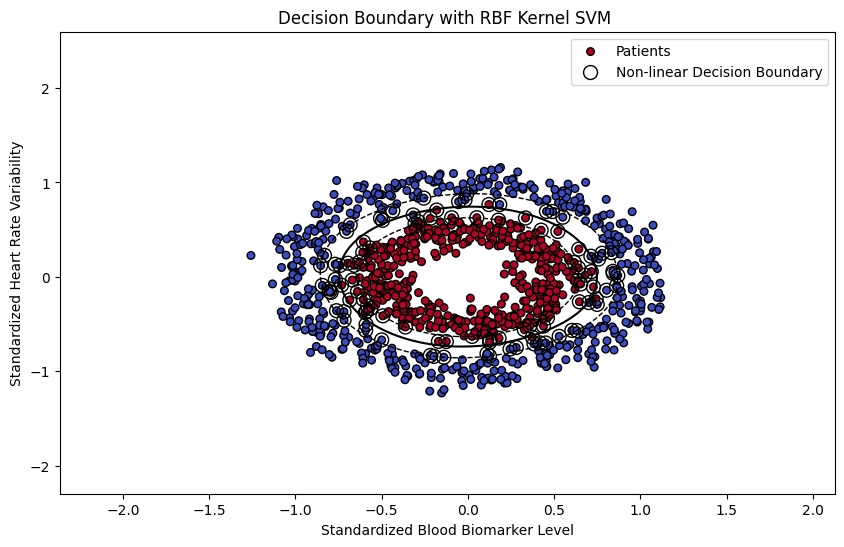

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y, 
    cmap='coolwarm', 
    s=30, 
    edgecolor='k')

plt.contour(
    xx, 
    yy, 
    decision_boundary, 
    levels=[0], 
    colors='black', 
    linewidths=1.5, 
    linestyles='-'
)

plt.contour(
    xx, 
    yy, 
    decision_boundary, 
    levels=[-1, 1], 
    colors='black', 
    linestyles='--', 
    linewidths=1
)

plt.scatter(
    svm_rbf.support_vectors_[:, 0], 
    svm_rbf.support_vectors_[:, 1], 
    s=100, 
    facecolors='none', 
    edgecolors='k', 
    label='Support Vectors'
)

plt.xlabel('Standardized Blood Biomarker Level')
plt.ylabel('Standardized Heart Rate Variability')
plt.title("Decision Boundary with RBF Kernel SVM ")
plt.legend(["Patients", "Non-linear Decision Boundary"])
plt.show()